In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as snsv

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(250,330)]
i =0
result = np.zeros((960))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[0:10,200:400,700:1000]
        plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        aveplot = np.nanmean(aveplot,axis=0)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [6]:
ww1 = np.convolve(result, np.ones((60,))/60, mode='valid')

In [8]:
ww1.shape

(901,)

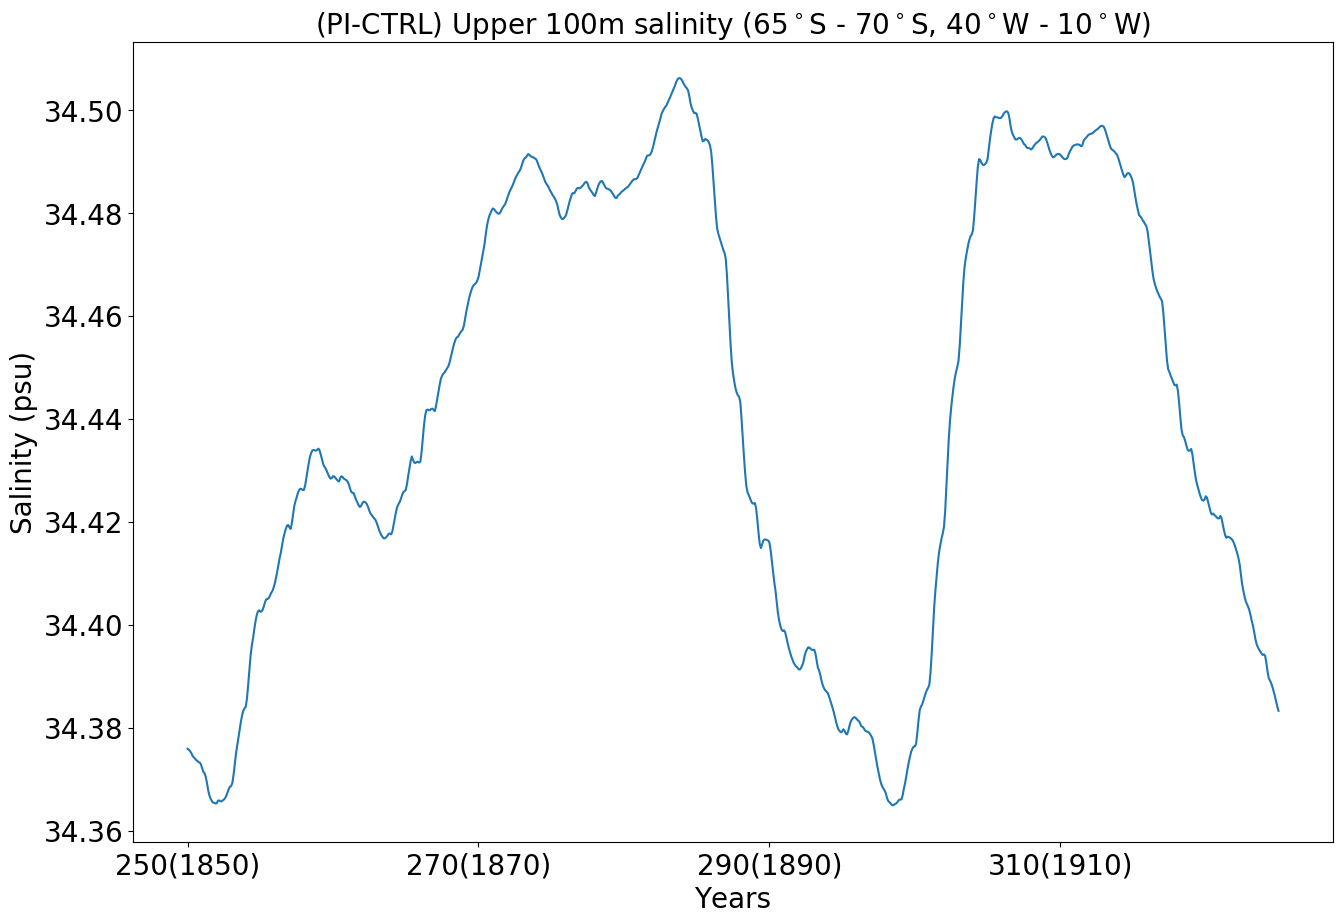

In [12]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(ww1)
#im = ax0.plot(final,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,901,240), ['250(1850)', '270(1870)','290(1890)', '310(1910)','330(1930)'],**my_font)
#plt.yticks(range(-205,-183,3), ['-205', '-202', '-199', '-196', '-193','-190','-187','-184'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Salinity (psu)',**my_font)
ax0.set_title('(PI-CTRL) Upper 100m salinity (65$^\circ$S - 70$^\circ$S, 40$^\circ$W - 10$^\circ$W)',**my_font)
plt.savefig("we.png")